In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import sys

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ml_coursera.regression.logistic import LogisticRegression


In [2]:
df = pd.read_csv('ex2data1.txt', header=None)
df.columns = ['exam_1', 'exam_2', 'label']

In [3]:
df.head()

,exam_1,exam_2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
reg = LogisticRegression(max_iter=10000, learning_rate=0.1)

In [5]:
df[["exam_1", "exam_2"]] = reg.normalize_features(df[["exam_1", "exam_2"]])

In [6]:
df.head()

,exam_1,exam_2,label
0,-1.594216,0.635141,0
1,-1.817101,-1.201489,0
2,-1.531325,0.359483,0
3,-0.280687,1.080923,1
4,0.688062,0.490905,1


In [7]:
x = df[["exam_1", "exam_2"]].to_numpy()
y = df.label.to_numpy()

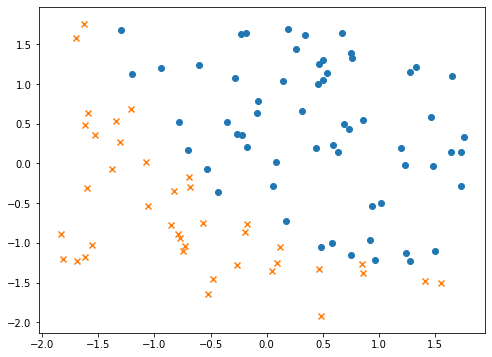

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(data=df[df['label'] == 1], x='exam_1', y='exam_2', marker='o')
plt.scatter(data=df[df['label'] == 0], x='exam_1', y='exam_2', marker='x')

In [9]:
# features_train, features_test, labels_train, labels_test = train_test_split(x, y, test_size=0.1, random_state=42)
features_train = x
labels_train = y

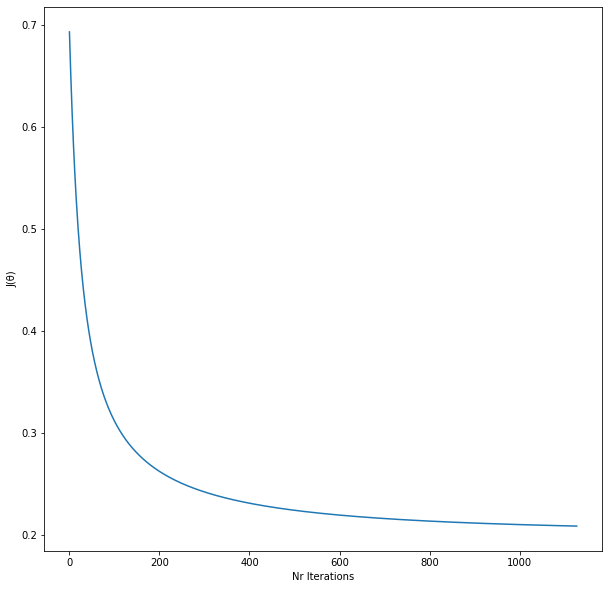

In [10]:
reg.fit(features_train, labels_train)

In [11]:
pred = reg.predict(features_train)
pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [12]:
reg.score(features_train, labels_train)

0.89

In [13]:
x1 = np.linspace(x[:,0].min(), x[:,0].max(), 2)
x2 = -(reg.coefficients[0] + reg.coefficients[1] * x1) / reg.coefficients[2]

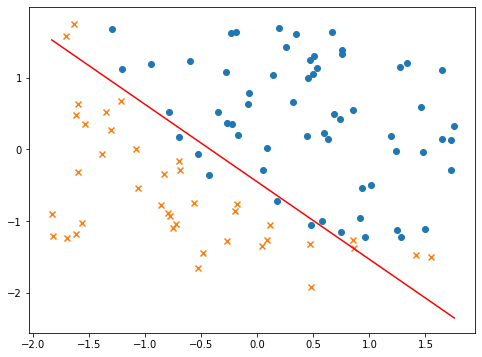

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(data=df[df['label'] == 1], x='exam_1', y='exam_2', marker='o')
plt.scatter(data=df[df['label'] == 0], x='exam_1', y='exam_2', marker='x')

plt.plot(x1, x2, c='r')

In [15]:
reg.coefficients

array([1.31278349, 3.150244  , 2.91023311])

In [16]:
reg.final_cost

0.2091734292708932

### Problem #2

In [17]:
df = pd.read_csv('ex2data2.txt', header=None)
df.columns = ['QA_1', 'QA_2', 'Pass']

In [18]:
df.head()

,QA_1,QA_2,Pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [19]:
reg = LogisticRegression(max_iter=10000, learning_rate=0.01, reg_param=200)

In [20]:
df[["QA_1", "QA_2"]] = reg.normalize_features(df[["QA_1", "QA_2"]])
df.head()

,QA_1,QA_2,Pass
0,-0.007071,0.993681,1
1,-0.297030,0.965551,1
2,-0.540596,0.979616,1
3,-0.865349,0.613935,1
4,-1.143712,0.543612,1


In [21]:
x = df[["QA_1", "QA_2"]].to_numpy()
y = df['Pass'].to_numpy()

In [22]:
def plot_data(df):
    plt.figure(figsize=(8, 6))
    plt.scatter(data=df[df['Pass'] == 1], x='QA_1', y='QA_2', marker='o')
    plt.scatter(data=df[df['Pass'] == 0], x='QA_1', y='QA_2', marker='x')

In [23]:
# features_train, features_test, labels_train, labels_test = train_test_split(x, y, test_size=0.1, random_state=42)

x = reg.feature_mapping(x, 10)

features_train = x
labels_train = y


Updated learning rate: 1: 0.001


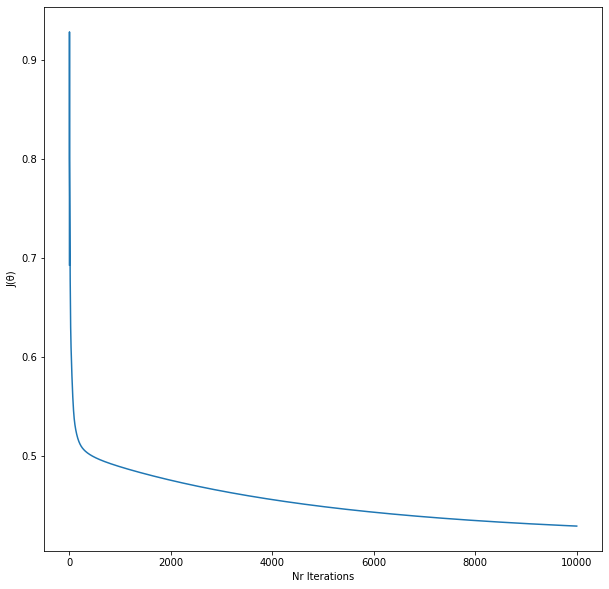

In [24]:
reg.fit(features_train, labels_train)

In [25]:
reg.score(features_train, labels_train)

0.8135593220338984

In [26]:
def plotDecisionBoundary(df, theta, x, y):
    """
    Plots the data points X and y into a new figure with the decision boundary defined by theta.
    Plots the data points with * for the positive examples and o for  the negative examples.
    Parameters
    ----------
    plotData : func
        A function reference for plotting the X, y data.
    theta : array_like
        Parameters for logistic regression. A vector of shape (n+1, ).
    X : array_like
        The input dataset. X is assumed to be  a either:
            1) Mx3 matrix, where the first column is an all ones column for the intercept.
            2) MxN, N>3 matrix, where the first column is all ones.
    y : array_like
        Vector of data labels of shape (m, ).
    """
    # make sure theta is a numpy array
    theta = np.array(theta)

    # Plot Data (remember first column in X is the intercept)
    plot_data(df)

    if x.shape[1] <= 2:
        
        x1 = np.linspace(x[:,0].min(), x[:,0].max(), 2)
        x2 = -(theta[0] + theta[1] * x1) / theta[2]
        
        # Plot, and adjust axes for better viewing
        plt.plot(x1, x2, color='r')

        # Legend, specific for the exercise
        plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
    else:
        # Here is the grid range
        u = np.linspace(x[:,0].min(), x[:,0].max(), 50)
        v = np.linspace(x[:,1].min(), x[:,1].max(), 50)

        z = np.zeros((u.size, v.size))
        # Evaluate z = theta*x over the grid
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(LogisticRegression.feature_mapping(np.array([[ui, vj]]), 10, intercept=True), theta)

        z = z.T  # important to transpose z before calling contour
        # print(z)

        # Plot z = 0
        plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)

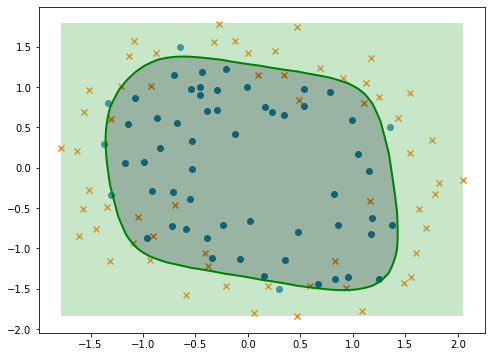

In [27]:
plotDecisionBoundary(df, reg.coefficients, x, y)